<a href="https://colab.research.google.com/github/atxpaul/netflixDataAnalytics/blob/main/AnalisisNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importación y carga de datos

In [25]:
from google.colab import files
datos=files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory (1).csv


In [26]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))



> 2. Análisis exploratorio



In [27]:
df.shape #Cuántas columnas y filas tenemos

(2307, 2)

In [28]:
df.info() #Descripción sobre las variables (las columnas y los datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2307 non-null   object
 1   Date    2307 non-null   object
dtypes: object(2)
memory usage: 36.2+ KB


In [29]:
df.head(50) #Sacamos los textos como tal, ahí se puede hacer el análisis para separar las variables. Parece que se separan mediante dos puntos (:)

,Title,Date
0,Homeland: Temporada 1: Piloto,30/8/21
1,El vicio del poder,28/8/21
2,The I-Land: Miniserie: La misma intensidad del...,28/8/21
3,The I-Land: Miniserie: Las soberbias torres,26/8/21
4,The I-Land: Miniserie: Hermosísimas criaturas,25/8/21
5,The I-Land: Miniserie: El más leve residuo,24/8/21
6,The I-Land: Miniserie: Los suntuosos palacios,23/8/21
7,The I-Land: Miniserie: Un mundo admirable,23/8/21
8,The Rain: Temporada 3: Esto también pasará,15/8/21
9,The Rain: Temporada 3: Quiérete,15/8/21


In [30]:
separacion_lista = df.Title.str.split(pat=':', expand=False).to_frame()
separacion_lista

,Title
0,"[Homeland, Temporada 1, Piloto]"
1,[El vicio del poder]
2,"[The I-Land, Miniserie, La misma intensidad ..."
3,"[The I-Land, Miniserie, Las soberbias torres]"
4,"[The I-Land, Miniserie, Hermosísimas criaturas]"
...,...
2302,"[Pokémon, Indigo League, Temporada 1, ¡Poké..."
2303,"[Sense8, Temporada 1, What’s Going On?]"
2304,"[Sense8, Temporada 1, Apuestas a favor de la..."
2305,"[Sense8, Temporada 1, Soy también un nosotros]"


In [31]:
separacion_lista['num_partes']=separacion_lista.Title.apply(len) #Sacamos el número de partes que se generó en la anterior sentencia para cada título
separacion_lista

,Title,num_partes
0,"[Homeland, Temporada 1, Piloto]",3
1,[El vicio del poder],1
2,"[The I-Land, Miniserie, La misma intensidad ...",3
3,"[The I-Land, Miniserie, Las soberbias torres]",3
4,"[The I-Land, Miniserie, Hermosísimas criaturas]",3
...,...,...
2302,"[Pokémon, Indigo League, Temporada 1, ¡Poké...",4
2303,"[Sense8, Temporada 1, What’s Going On?]",3
2304,"[Sense8, Temporada 1, Apuestas a favor de la...",3
2305,"[Sense8, Temporada 1, Soy también un nosotros]",3


In [32]:
separacion_lista.num_partes.value_counts() #Sacamos los valores que más se repiten

3    2008
1     148
4      84
5      36
2      31
Name: num_partes, dtype: int64

In [33]:
separacion_lista.loc[separacion_lista.num_partes==1].head(10) #Buscamos patrones. 1=Película

,Title,num_partes
1,[El vicio del poder],1
29,[La red social],1
58,[Plan de escape],1
81,[A la mierda el 2020],1
84,[Sigo como Dios],1
87,[The Interview],1
116,[Descifrando enigma],1
180,[El lobo de Wall Street],1
217,[Argo],1
218,[La terminal],1


In [34]:
separacion_lista.loc[separacion_lista.num_partes==2].head(10) #Películas y alguna serie concreta.

,Title,num_partes
28,"[Spider-Man, Lejos de casa]",2
509,"[Spenser, Confidencial]",2
702,"[American Pie, ¡Menuda boda!]",2
735,"[Jack Ryan, Operación Sombra]",2
1007,"[Moneyball, Rompiendo las reglas]",2
1009,"[Adam Devine, Best Time of Our Lives]",2
1037,"[Black Mirror, Bandersnatch]",2
1038,"[ , ]",2
1181,"[Fast & Furious, aún más rápido]",2
1183,"[Mechanic, Resurrection]",2


In [35]:
separacion_lista.loc[separacion_lista.num_partes==3].head(10) #Series

,Title,num_partes
0,"[Homeland, Temporada 1, Piloto]",3
2,"[The I-Land, Miniserie, La misma intensidad ...",3
3,"[The I-Land, Miniserie, Las soberbias torres]",3
4,"[The I-Land, Miniserie, Hermosísimas criaturas]",3
5,"[The I-Land, Miniserie, El más leve residuo]",3
6,"[The I-Land, Miniserie, Los suntuosos palacios]",3
7,"[The I-Land, Miniserie, Un mundo admirable]",3
8,"[The Rain, Temporada 3, Esto también pasará]",3
9,"[The Rain, Temporada 3, Quiérete]",3
10,"[The Rain, Temporada 3, Sé el cambio que qui...",3


In [36]:
separacion_lista.loc[separacion_lista.num_partes==4].head(10) #Series

,Title,num_partes
96,"[Loaded, Loaded, Temporada 1, El fin de Cat...",4
97,"[Loaded, Loaded, Temporada 1, La Expo]",4
98,"[Loaded, Loaded, Temporada 1, La Lista Roja]",4
99,"[Loaded, Loaded, Temporada 1, El barco]",4
100,"[Loaded, Loaded, Temporada 1, La madre de W...",4
101,"[Loaded, Loaded, Temporada 1, Los padres de...",4
102,"[Loaded, Loaded, Temporada 1, El profesor d...",4
103,"[Loaded, Loaded, Temporada 1, Demanda]",4
175,"[South Park, Temporada 23, Finca Tegridad, ...",4
238,"[Modern Family, Temporada 11, Final, 2.ª pa...",4


In [37]:
separacion_lista.loc[separacion_lista.num_partes==5].head(10) #Series

,Title,num_partes
181,"[24, Temporada 9, De 22, 00 a 11, 00]",5
182,"[24, Temporada 9, De 21, 00 a 22, 00]",5
183,"[24, Temporada 9, De 20, 00 a 21, 00]",5
184,"[24, Temporada 9, De 19, 00 a 20, 00]",5
185,"[24, Temporada 9, De 18, 00 a 19, 00]",5
186,"[24, Temporada 9, De 17, 00 a 18, 00]",5
187,"[24, Temporada 9, De 16, 00 a 17, 00]",5
188,"[24, Temporada 9, De 15, 00 a 16, 00]",5
189,"[24, Temporada 9, De 14, 00 a 15, 00]",5
190,"[24, Temporada 9, De 13, 00 a 14, 00]",5


3. Creación de variables

3.1 Variables derivadas del título

In [38]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie') #Creamos la variable a partir del número de partes
separacion_lista

,Title,num_partes,tipo
0,"[Homeland, Temporada 1, Piloto]",3,serie
1,[El vicio del poder],1,pelicula
2,"[The I-Land, Miniserie, La misma intensidad ...",3,serie
3,"[The I-Land, Miniserie, Las soberbias torres]",3,serie
4,"[The I-Land, Miniserie, Hermosísimas criaturas]",3,serie
...,...,...,...
2302,"[Pokémon, Indigo League, Temporada 1, ¡Poké...",4,serie
2303,"[Sense8, Temporada 1, What’s Going On?]",3,serie
2304,"[Sense8, Temporada 1, Apuestas a favor de la...",3,serie
2305,"[Sense8, Temporada 1, Soy también un nosotros]",3,serie


In [39]:
df = pd.concat([df,separacion_lista['tipo']], axis=1) #Añadimos la variable al set principal, df
df

,Title,Date,tipo
0,Homeland: Temporada 1: Piloto,30/8/21,serie
1,El vicio del poder,28/8/21,pelicula
2,The I-Land: Miniserie: La misma intensidad del...,28/8/21,serie
3,The I-Land: Miniserie: Las soberbias torres,26/8/21,serie
4,The I-Land: Miniserie: Hermosísimas criaturas,25/8/21,serie
...,...,...,...
2302,"Pokémon: Indigo League: Temporada 1: ¡Pokémon,...",24/10/15,serie
2303,Sense8: Temporada 1: What’s Going On?,24/10/15,serie
2304,Sense8: Temporada 1: Apuestas a favor de la fl...,24/10/15,serie
2305,Sense8: Temporada 1: Soy también un nosotros,24/10/15,serie


In [40]:
#Dividir títulos en niveles y generar nuevas variables
separacion_cols = df.Title.str.split(pat=':', expand=True)
separacion_cols

,0,1,2,3,4
0,Homeland,Temporada 1,Piloto,None,None
1,El vicio del poder,None,None,None,None
2,The I-Land,Miniserie,La misma intensidad del globo,None,None
3,The I-Land,Miniserie,Las soberbias torres,None,None
4,The I-Land,Miniserie,Hermosísimas criaturas,None,None
...,...,...,...,...,...
2302,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None
2303,Sense8,Temporada 1,What’s Going On?,None,None
2304,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None
2305,Sense8,Temporada 1,Soy también un nosotros,None,None


In [41]:
separacion_cols.columns=['nivel1','nivel2','nivel3','nivel4','nivel5'] #renombramos variables
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Homeland,Temporada 1,Piloto,None,None
1,El vicio del poder,None,None,None,None
2,The I-Land,Miniserie,La misma intensidad del globo,None,None
3,The I-Land,Miniserie,Las soberbias torres,None,None
4,The I-Land,Miniserie,Hermosísimas criaturas,None,None
...,...,...,...,...,...
2302,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None
2303,Sense8,Temporada 1,What’s Going On?,None,None
2304,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None
2305,Sense8,Temporada 1,Soy también un nosotros,None,None


In [42]:
df = pd.concat([df,separacion_cols], axis = 1) #Añadimos la variable al set principal, df
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Homeland: Temporada 1: Piloto,30/8/21,serie,Homeland,Temporada 1,Piloto,None,None
1,El vicio del poder,28/8/21,pelicula,El vicio del poder,None,None,None,None
2,The I-Land: Miniserie: La misma intensidad del...,28/8/21,serie,The I-Land,Miniserie,La misma intensidad del globo,None,None
3,The I-Land: Miniserie: Las soberbias torres,26/8/21,serie,The I-Land,Miniserie,Las soberbias torres,None,None
4,The I-Land: Miniserie: Hermosísimas criaturas,25/8/21,serie,The I-Land,Miniserie,Hermosísimas criaturas,None,None
...,...,...,...,...,...,...,...,...
2302,"Pokémon: Indigo League: Temporada 1: ¡Pokémon,...",24/10/15,serie,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None
2303,Sense8: Temporada 1: What’s Going On?,24/10/15,serie,Sense8,Temporada 1,What’s Going On?,None,None
2304,Sense8: Temporada 1: Apuestas a favor de la fl...,24/10/15,serie,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None
2305,Sense8: Temporada 1: Soy también un nosotros,24/10/15,serie,Sense8,Temporada 1,Soy también un nosotros,None,None


3.2 Variables derivadas de la fecha

In [43]:
df ['fecha']=pd.to_datetime(df.Date) #Cambiamos tipo de variable fecha a fecha (antes era object)
df.drop(columns='Date',inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Homeland: Temporada 1: Piloto,serie,Homeland,Temporada 1,Piloto,None,None,2021-08-30
1,El vicio del poder,pelicula,El vicio del poder,None,None,None,None,2021-08-28
2,The I-Land: Miniserie: La misma intensidad del...,serie,The I-Land,Miniserie,La misma intensidad del globo,None,None,2021-08-28
3,The I-Land: Miniserie: Las soberbias torres,serie,The I-Land,Miniserie,Las soberbias torres,None,None,2021-08-26
4,The I-Land: Miniserie: Hermosísimas criaturas,serie,The I-Land,Miniserie,Hermosísimas criaturas,None,None,2021-08-25
...,...,...,...,...,...,...,...,...
2302,"Pokémon: Indigo League: Temporada 1: ¡Pokémon,...",serie,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None,2015-10-24
2303,Sense8: Temporada 1: What’s Going On?,serie,Sense8,Temporada 1,What’s Going On?,None,None,2015-10-24
2304,Sense8: Temporada 1: Apuestas a favor de la fl...,serie,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None,2015-10-24
2305,Sense8: Temporada 1: Soy también un nosotros,serie,Sense8,Temporada 1,Soy también un nosotros,None,None,2015-10-24


In [44]:
df.set_index('fecha',inplace=True) #pasamos la fecha al índice
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2021-08-30,Homeland: Temporada 1: Piloto,serie,Homeland,Temporada 1,Piloto,None,None
2021-08-28,El vicio del poder,pelicula,El vicio del poder,None,None,None,None
2021-08-28,The I-Land: Miniserie: La misma intensidad del...,serie,The I-Land,Miniserie,La misma intensidad del globo,None,None
2021-08-26,The I-Land: Miniserie: Las soberbias torres,serie,The I-Land,Miniserie,Las soberbias torres,None,None
2021-08-25,The I-Land: Miniserie: Hermosísimas criaturas,serie,The I-Land,Miniserie,Hermosísimas criaturas,None,None
...,...,...,...,...,...,...,...
2015-10-24,"Pokémon: Indigo League: Temporada 1: ¡Pokémon,...",serie,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None
2015-10-24,Sense8: Temporada 1: What’s Going On?,serie,Sense8,Temporada 1,What’s Going On?,None,None
2015-10-24,Sense8: Temporada 1: Apuestas a favor de la fl...,serie,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None


In [45]:
#Creamos una función para extraer los componentes de la fecha
def atributos_fechas(data):
    data['año']=data.index.year
    data['mes']=data.index.month_name()
    data['dia_mes']=data.index.day
    data['dia_semana']=data.index.day_name()
    return(data)

In [46]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2021-08-30,Homeland: Temporada 1: Piloto,serie,Homeland,Temporada 1,Piloto,None,None,2021,August,30,Monday
2021-08-28,El vicio del poder,pelicula,El vicio del poder,None,None,None,None,2021,August,28,Saturday
2021-08-28,The I-Land: Miniserie: La misma intensidad del...,serie,The I-Land,Miniserie,La misma intensidad del globo,None,None,2021,August,28,Saturday
2021-08-26,The I-Land: Miniserie: Las soberbias torres,serie,The I-Land,Miniserie,Las soberbias torres,None,None,2021,August,26,Thursday
2021-08-25,The I-Land: Miniserie: Hermosísimas criaturas,serie,The I-Land,Miniserie,Hermosísimas criaturas,None,None,2021,August,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-24,"Pokémon: Indigo League: Temporada 1: ¡Pokémon,...",serie,Pokémon,Indigo League,Temporada 1,"¡Pokémon, te elijo a ti!",None,2015,October,24,Saturday
2015-10-24,Sense8: Temporada 1: What’s Going On?,serie,Sense8,Temporada 1,What’s Going On?,None,None,2015,October,24,Saturday
2015-10-24,Sense8: Temporada 1: Apuestas a favor de la fl...,serie,Sense8,Temporada 1,Apuestas a favor de la flacucha,None,None,2015,October,24,Saturday


4. Análisis

In [49]:
#Sacamos desde cuando usamos netflix
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Llevas usando neflix {tiempo.days} dias')

Llevas usando neflix 2424 dias


In [50]:
#Gastado en Netflix. Pongamos que de media han sido unos 15 euros

coste_mensual = 12

gasto = tiempo.days/30*coste_mensual

print(f'Hasta ahora has gastado {gasto} euros en Netflix')

Hasta ahora has gastado 969.5999999999999 euros en Netflix


In [51]:
#Tiempo de mi vida dedicado a Netflix

media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Al año dedicas 20 dias de tu vida a ver series y 4 dias de tu vida a ver pelis


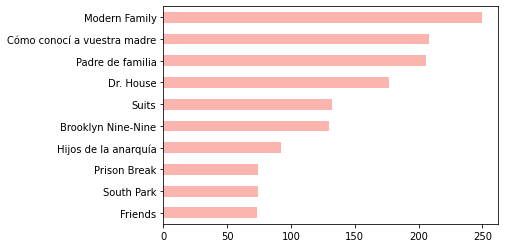

In [52]:
#10 series más vistas
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

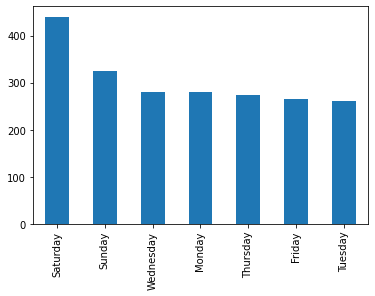

In [53]:
#Día de la semana que más series veo
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

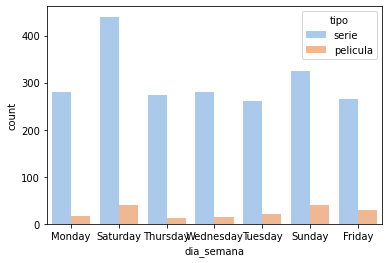

In [54]:
#Diferencias entre series y películas
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

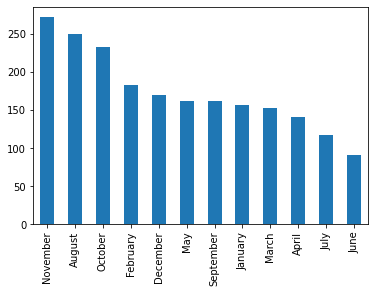

In [55]:
#Consumo a lo largo de los meses
df.loc[df.año < 2021].mes.value_counts().plot.bar();

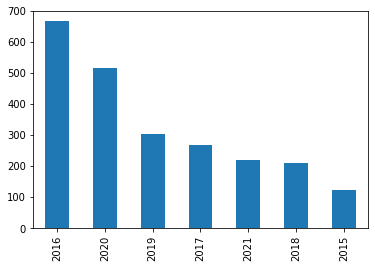

In [56]:
#Consumo a lo largo de los años
df.año.value_counts().plot.bar();